In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from algorithms import lagrange, spline

In [2]:
data = pd.read_csv("Data/stale.txt", sep=",", names=['Distance', 'Elevation'])
print(data.head(20))
print(data.tail(2))

      Distance   Elevation
0     0.000000  692.624023
1     6.661448  692.590149
2    13.322896  691.646423
3    19.984344  691.023193
4    26.645793  691.073303
5    33.307241  692.199707
6    39.968689  693.603088
7    46.630137  694.917236
8    53.291585  696.664917
9    59.953033  698.523987
10   66.614481  699.637451
11   73.275930  700.864502
12   79.937378  702.528259
13   86.598826  703.899902
14   93.260274  705.788635
15   99.921722  708.219116
16  106.583170  710.540283
17  113.244618  712.959839
18  119.906067  714.952087
19  126.567515  716.472961
        Distance    Elevation
510  3397.338552  2344.023193
511  3404.000000  2339.809570


In [3]:
data_matrix = data.to_numpy()

In [4]:
dataset = []
for file in os.listdir("Data"):
    dataset.append(pd.read_csv("Data/stale.txt", sep=",", names=['Distance', 'Elevation']))

60


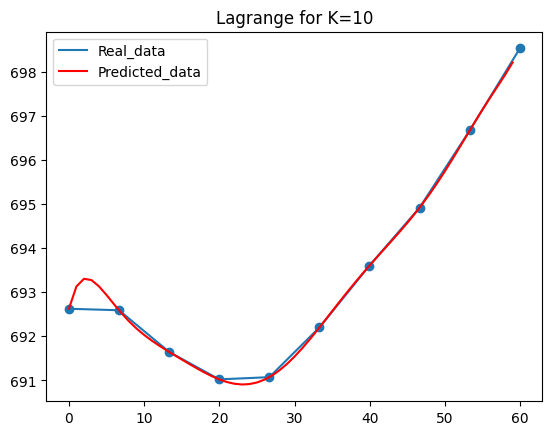

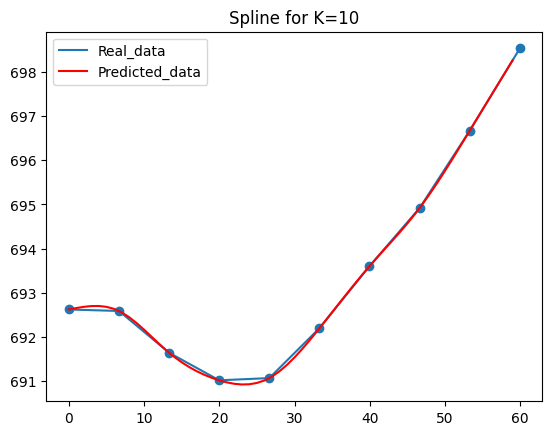

94


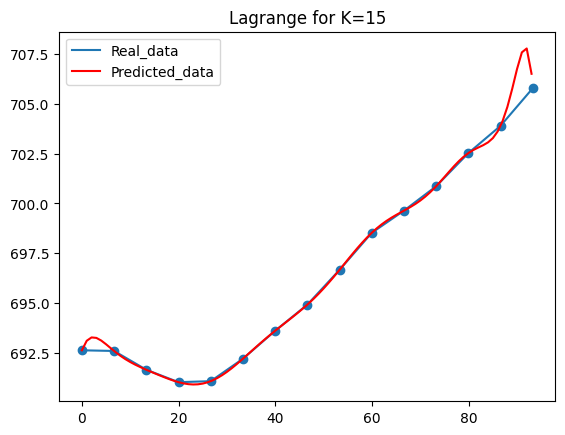

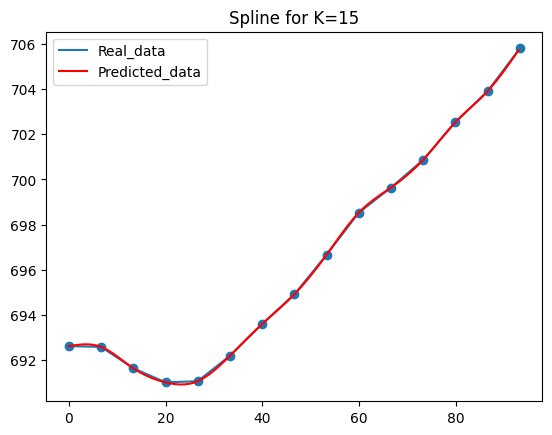

127


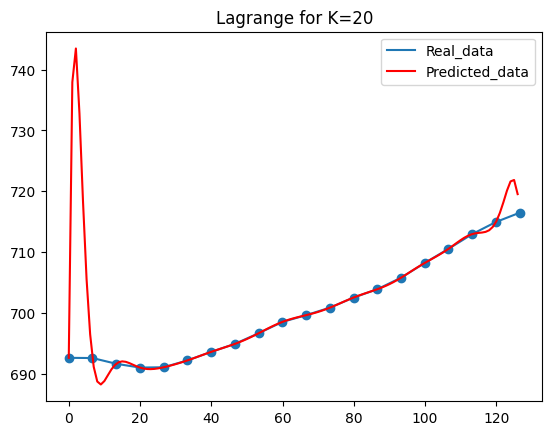

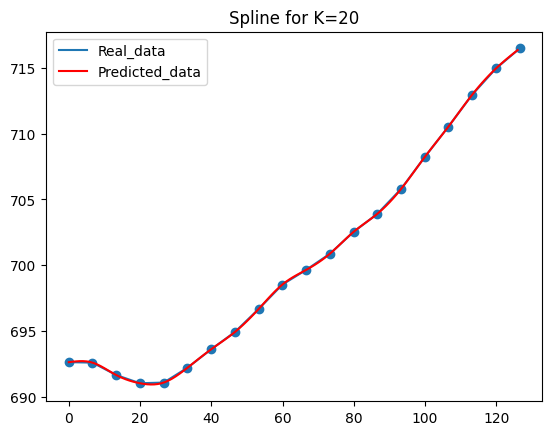

In [5]:
K = [10,15,20]

for k in K:
    len_of_k = int(data_matrix[k-1][0])+1
    print(len_of_k)
    y_pred_lagrange = np.zeros(len_of_k)
    y_pred_spline = np.zeros(len_of_k)
    for i in range(len_of_k):
        y_pred_lagrange[i] = lagrange(data_matrix[:k, 0], data_matrix[:k, 1], i)
        y_pred_spline[i] = spline(data_matrix[:k, 0], data_matrix[:k, 1], i)
    plt.title(f"Lagrange for K={k}")
    plt.plot(data_matrix[:k, 0], data_matrix[:k, 1], label="Real_data")
    plt.scatter(data_matrix[:k, 0], data_matrix[:k, 1])
    plt.plot(np.arange(0,len_of_k,1), y_pred_lagrange, 'r',label="Predicted_data")
    plt.legend()
    plt.show()

    plt.title(f"Spline for K={k}")
    plt.plot(data_matrix[:k, 0], data_matrix[:k, 1], label="Real_data")
    plt.scatter(data_matrix[:k, 0], data_matrix[:k, 1])
    plt.plot(np.arange(0,len_of_k,1), y_pred_spline, 'r',label="Predicted_data")
    plt.legend()
    plt.show()
